### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.inspection import permutation_importance
import pickle

### Load Data and Data info

In [91]:
df = pd.read_csv("yield_df.csv")
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [93]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


### Data Preprocessing

In [98]:
#Load the dataset
df = pd.read_csv('yield_df.csv')  # Update path if needed
df = df.drop(columns=['Unnamed: 0'])

#Initialize encoders and scalers
label_encoder_area = LabelEncoder()
label_encoder_item = LabelEncoder()
scaler_features = StandardScaler()
target_scaler = StandardScaler()
#Encode categorical columns
df_encoded = df.copy()
df_encoded['Area'] = label_encoder_area.fit_transform(df['Area'])
df_encoded['Item'] = label_encoder_item.fit_transform(df['Item'])

#Scale numerical features
features_to_scale = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year']
df_encoded[features_to_scale] = scaler_features.fit_transform(df_encoded[features_to_scale])
df_encoded['hg/ha_yield'] = target_scaler.fit_transform(df_encoded[['hg/ha_yield']])


#Save preprocessors
with open('label_encoder_area.pkl', 'wb') as f:
    pickle.dump(label_encoder_area, f)
with open('label_encoder_item.pkl', 'wb') as f:
    pickle.dump(label_encoder_item, f)
with open('scaler_features.pkl', 'wb') as f:
    pickle.dump(scaler_features, f)
with open('scaler_target.pkl', 'wb') as f:
    pickle.dump(target_scaler, f)



In [100]:
df_encoded

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,-1.637075,-0.476020,0.473294,-0.616366,-0.661069
1,0,3,-1.637075,-0.122257,0.473294,-0.616366,-0.661069
2,0,4,-1.637075,-0.632338,0.473294,-0.616366,-0.661069
3,0,5,-1.637075,-0.759852,0.473294,-0.616366,-0.661069
4,0,6,-1.637075,-0.824592,0.473294,-0.616366,-0.661069
...,...,...,...,...,...,...,...
28237,100,4,1.624512,-0.641190,-0.693232,-0.575853,-0.123991
28238,100,5,1.624512,-0.870899,-0.693232,-0.575853,-0.123991
28239,100,6,1.624512,-0.752295,-0.693232,-0.575853,-0.123991
28240,100,7,1.624512,-0.645415,-0.693232,-0.575853,-0.123991


### Split Data

In [103]:
# Step 7: Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['hg/ha_yield'])  # Features (excluding target)
y = df_encoded['hg/ha_yield']  # Target variable

In [105]:
# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [107]:
X_test

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
25564,85,4,0.915472,-0.722818,0.060744,-0.527988
18113,56,8,-0.786226,0.512742,-0.615849,-0.131913
25607,85,5,1.199088,-0.722818,0.032791,-0.638889
6815,22,3,0.773663,2.945823,0.756569,1.094335
18144,56,7,-0.218994,0.512742,-0.616208,-0.141419
...,...,...,...,...,...,...
6674,22,4,-0.502610,2.945823,0.393779,0.400412
8786,32,5,-0.928035,-0.397374,0.782786,-1.402521
9527,36,8,-0.928035,1.193216,-0.418171,-0.089137
18956,61,1,1.199088,1.256614,-0.606185,0.653899


### Train the model

In [121]:
final_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
 
        Dense(1)  # Output layer
    ])
# Compile the model
final_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
# Train the model
history = final_model.fit(
        X_train, 
        y_train, 
        validation_data=(X_val, y_val), 
        epochs=50, 
        batch_size=32, 
      # Suppress detailed output
    )

 # Predictions for evaluation
y_pred = final_model.predict(X_test, verbose=0)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}, Mean Absolute Error (MAE): {mae:.4f}")

# After training the model
final_model.save("final_model.h5")  # Save as an HDF5 file 

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6547 - mae: 1.0145 - val_loss: 0.7924 - val_mae: 0.7118
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9298 - mae: 0.7309 - val_loss: 0.8860 - val_mae: 0.6296
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8170 - mae: 0.6872 - val_loss: 0.6910 - val_mae: 0.5965
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8129 - mae: 0.6893 - val_loss: 0.6665 - val_mae: 0.6125
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7874 - mae: 0.6749 - val_loss: 0.6343 - val_mae: 0.5958
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7352 - mae: 0.6534 - val_loss: 0.7420 - val_mae: 0.5917
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6975 - mae: 0.6383 - val_loss: 0.5796 - val_mae: 0.5655
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6822 - mae: 0.6271 - val_loss: 0.6064 - val_mae: 0.5515
Epoch 9/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6384 

Mean Squared Error (MSE): 0.1859, Mean Absolute Error (MAE): 0.2762


### Model Performance Visulization

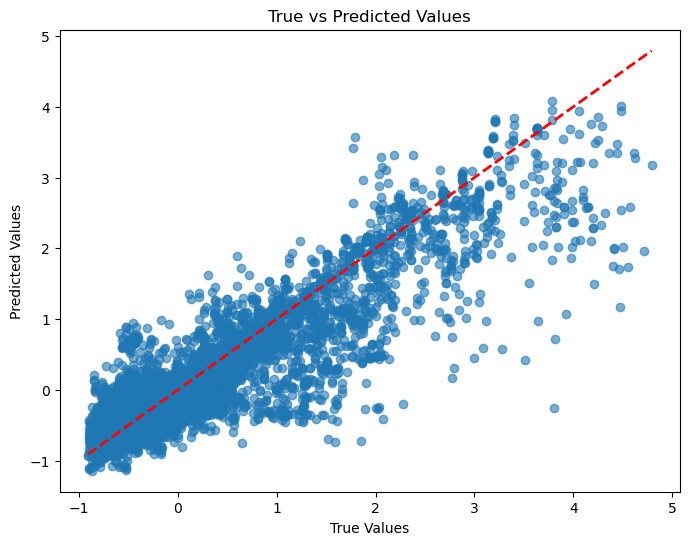

In [138]:
# Make predictions on the test set
y_pred = final_model.predict(X_test, verbose=0)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

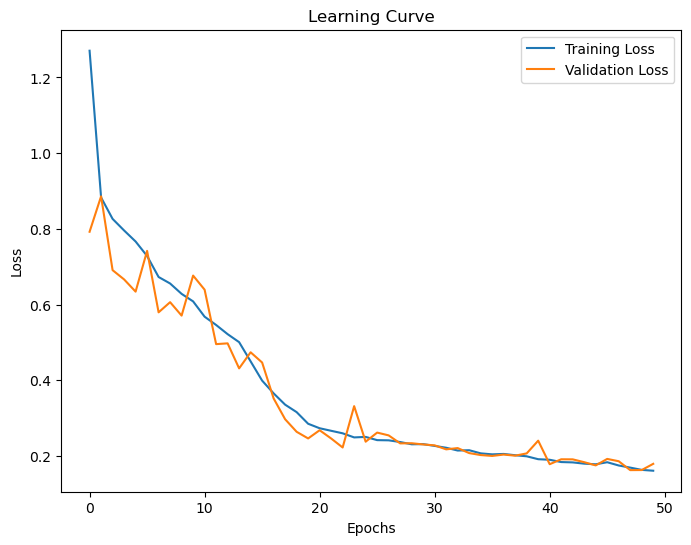

In [140]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


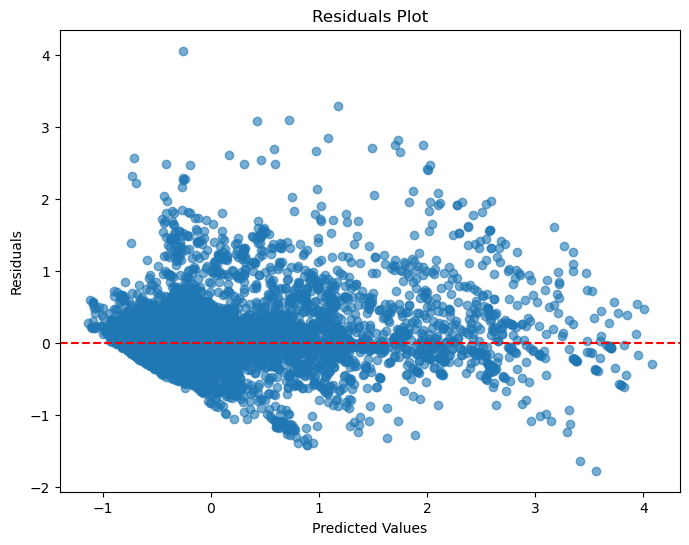

In [142]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
